#Reconocimiento de Patrones
##Dr. Carlos Villaseñor
##Lección 3 - Regresión no lineal y autoregresión

## Regresión no lineal

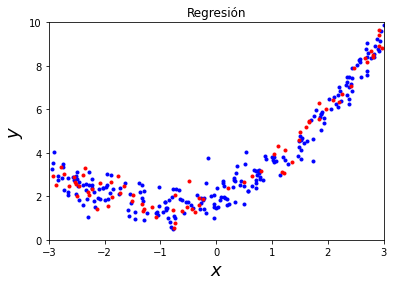

In [ ]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(42)
m = 300
r = 0.5
ruido = r* np.random.randn(m, 1)
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + ruido


xtrain, xtest, ytrain, ytest = train_test_split(x,y)

#Dibujar datos
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "r.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.title('Regresión')
plt.axis([-3, 3, 0, 10])
plt.show()

K vecinos más cercanos

Train:  0.9633737973281776
Test:  0.9642878827542761


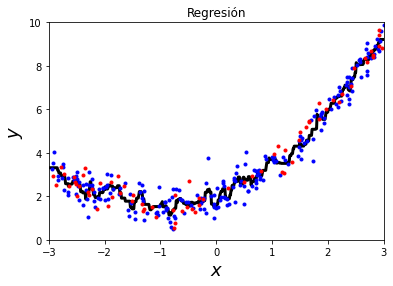

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5, weights = 'uniform')
model.fit(xtrain, ytrain)

print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))

x_new = np.linspace(-3, 3, 600).reshape(-1, 1)
y_pred = model.predict(x_new)
plt.plot(x_new, y_pred,'k-', linewidth=3)

#Dibujar datos
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "r.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.title('Regresión')
plt.axis([-3, 3, 0, 10])
plt.show()

Arboles de Desición


Train:  1.0
Test:  0.9389274945378348


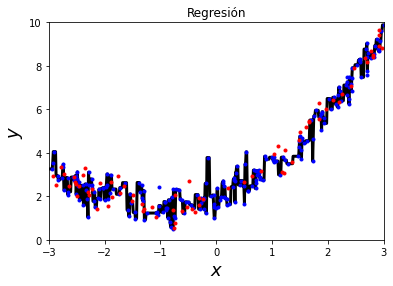

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=100)
model.fit(xtrain, ytrain)

print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))

x_new = np.linspace(-3, 3, 600).reshape(-1, 1)
y_pred = model.predict(x_new)
plt.plot(x_new, y_pred,'k-', linewidth=3)

#Dibujar datos
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "r.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.title('Regresión')
plt.axis([-3, 3, 0, 10])
plt.show()

Máquina de Soporte Vectorial

Train:  0.9541969014125329
Test:  0.9667922107451523


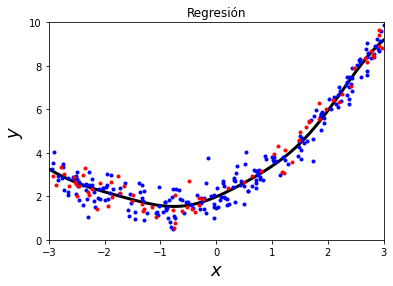

In [ ]:
from sklearn.svm import SVR

model = SVR(gamma='scale', C=10, epsilon=0.1, kernel='rbf')
model.fit(xtrain, ytrain.ravel())

print('Train: ', model.score(xtrain, ytrain.ravel()))
print('Test: ', model.score(xtest, ytest.ravel()))

x_new = np.linspace(-3, 3, 600).reshape(-1, 1)
y_pred = model.predict(x_new)
plt.plot(x_new, y_pred,'k-', linewidth=3)

#Dibujar datos
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "r.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.title('Regresión')
plt.axis([-3, 3, 0, 10])
plt.show()

Kernel Ridge

Train:  0.9552385775592783
Test:  0.9659975625747272


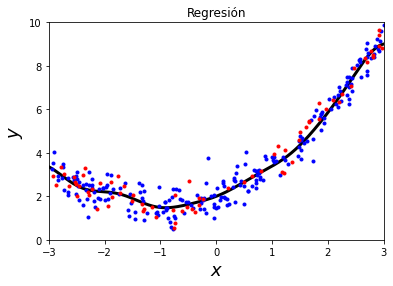

In [ ]:
from sklearn.kernel_ridge import KernelRidge

model = KernelRidge(alpha=0.1, kernel= 'rbf')
model.fit(xtrain, ytrain.ravel())

print('Train: ', model.score(xtrain, ytrain.ravel()))
print('Test: ', model.score(xtest, ytest.ravel()))

x_new = np.linspace(-3, 3, 600).reshape(-1, 1)
y_pred = model.predict(x_new)
plt.plot(x_new, y_pred,'k-', linewidth=3)

#Dibujar datos
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "r.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.title('Regresión')
plt.axis([-3, 3, 0, 10])
plt.show()

Proceso Gaussiano

Train:  0.9538908541541176
Test:  0.9626552911988783


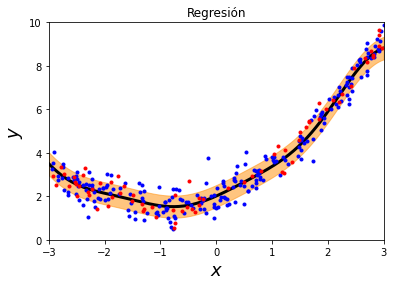

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared

gp_kernel = ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1)) \
            + WhiteKernel(1e-1)
model = GaussianProcessRegressor(kernel=gp_kernel)

model.fit(xtrain,ytrain)


print('Train: ', model.score(xtrain, ytrain.ravel()))
print('Test: ', model.score(xtest, ytest.ravel()))

x_new = np.linspace(-3, 3, 600).reshape(-1, 1)
y_pred, y_std = model.predict(x_new, return_std=True)
plt.plot(x_new, y_pred,'k-', linewidth=3)
plt.fill_between(x_new.ravel(), y_pred.ravel() - y_std.ravel(),
                 y_pred.ravel() + y_std.ravel(), color='darkorange',
                 alpha=0.5)

#Dibujar datos
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "r.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.title('Regresión')
plt.axis([-3, 3, 0, 10])
plt.show()

Perceptrón Multicapa

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train:  0.938663997228792
Test:  0.9524741508069572


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


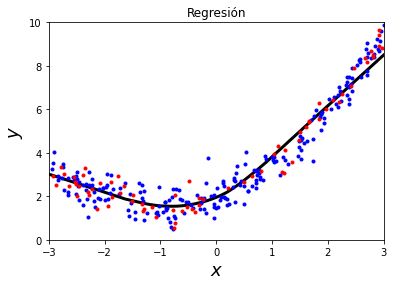

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor()
model.fit(xtrain,ytrain)


print('Train: ', model.score(xtrain, ytrain.ravel()))
print('Test: ', model.score(xtest, ytest.ravel()))

x_new = np.linspace(-3, 3, 600).reshape(-1, 1)
y_pred = model.predict(x_new)
plt.plot(x_new, y_pred,'k-', linewidth=3)


#Dibujar datos
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "r.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.title('Regresión')
plt.axis([-3, 3, 0, 10])
plt.show()

## Autoregresión

Primeramente vamos a leer unos datos

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving daily-min-temperatures.csv to daily-min-temperatures (2).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('daily-min-temperatures.csv')
print(df.head())

         Date  Temp
0  1981-01-01  20.7
1  1981-01-02  17.9
2  1981-01-03  18.8
3  1981-01-04  14.6
4  1981-01-05  15.8


Veamos estos datos

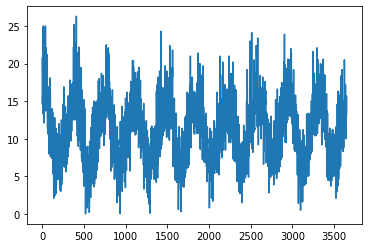

In [ ]:
x = np.asanyarray(df[['Temp']])
plt.plot(x)

Vemos como se relaciona un dia con el anterior

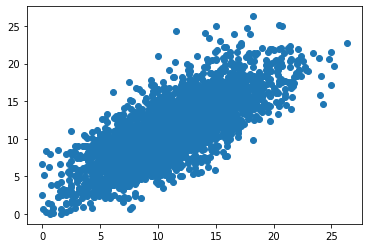

In [ ]:
 plt.scatter(x[1:], x[:-1])

Calculemos la correlación


In [ ]:
np.corrcoef(x[1:].T, x[:-1].T)

array([[1.        , 0.77487022],
       [0.77487022, 1.        ]])

Ahora bien podemos ver como se relaciona un día con otro solo cambiando el retardo

array([[1.        , 0.63111946],
       [0.63111946, 1.        ]])

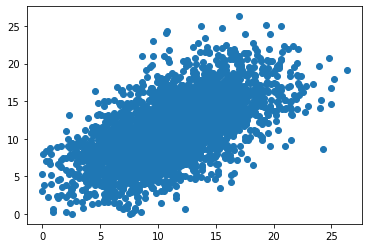

In [ ]:
delay = 2
plt.scatter(x[delay:], x[:-delay])
np.corrcoef(x[delay:].T, x[:-delay].T)

Podemos graficar estas correlaciones de la siguiente manera

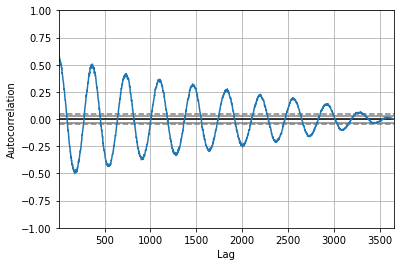

In [ ]:
pd.plotting.autocorrelation_plot(df.Temp)

Vamos a preparar los datos

In [ ]:
df2 = pd.DataFrame(df.Temp)

delay = 10
for i in range(1, delay+1):
  df2 = pd. concat([df2, df.Temp.shift(-i)], axis=1)
df2= df2[:-delay]
print(df2)

      Temp  Temp  Temp  Temp  Temp  Temp  Temp  Temp  Temp  Temp  Temp
0     20.7  17.9  18.8  14.6  15.8  15.8  15.8  17.4  21.8  20.0  16.2
1     17.9  18.8  14.6  15.8  15.8  15.8  17.4  21.8  20.0  16.2  13.3
2     18.8  14.6  15.8  15.8  15.8  17.4  21.8  20.0  16.2  13.3  16.7
3     14.6  15.8  15.8  15.8  17.4  21.8  20.0  16.2  13.3  16.7  21.5
4     15.8  15.8  15.8  17.4  21.8  20.0  16.2  13.3  16.7  21.5  25.0
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
3635  13.9  17.2  14.7  15.4  13.1  13.2  13.9  10.0  12.9  14.6  14.0
3636  17.2  14.7  15.4  13.1  13.2  13.9  10.0  12.9  14.6  14.0  13.6
3637  14.7  15.4  13.1  13.2  13.9  10.0  12.9  14.6  14.0  13.6  13.5
3638  15.4  13.1  13.2  13.9  10.0  12.9  14.6  14.0  13.6  13.5  15.7
3639  13.1  13.2  13.9  10.0  12.9  14.6  14.0  13.6  13.5  15.7  13.0

[3640 rows x 11 columns]


Seleccionemos nuestros datos

In [ ]:
x = np.asanyarray(df2.iloc[:,:-1])
y = np.asanyarray(df2.iloc[:,-1])
print(x)
print(y)

[[20.7 17.9 18.8 ... 17.4 21.8 20. ]
 [17.9 18.8 14.6 ... 21.8 20.  16.2]
 [18.8 14.6 15.8 ... 20.  16.2 13.3]
 ...
 [14.7 15.4 13.1 ... 14.6 14.  13.6]
 [15.4 13.1 13.2 ... 14.  13.6 13.5]
 [13.1 13.2 13.9 ... 13.6 13.5 15.7]]
[16.2 13.3 16.7 ... 13.5 15.7 13. ]


Ahora vamos a construir y probar el modelo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

xtrain, xtest, ytrain, ytest = train_test_split(x,y)

model = LinearRegression()

model.fit(xtrain, ytrain)

print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))

Train:  0.6484283014573589
Test:  0.6249043987824726
